In [1]:
import librosa
import os
import pandas as pd
import numpy as np
import fnmatch
import matplotlib.pyplot as plt
%matplotlib inline
import IPython.display as ipd
import librosa.display
plt.ioff()

PATH = "C:\\Users\\frapo\\Downloads\\heartbeat-sounds"

In [2]:
def build_dataset():
    murmurs = ['set_b/'+ m for m in fnmatch.filter(os.listdir(PATH+'/set_b'), 'murmur*.wav')]
    murmurs += ['set_a/'+ m for m in fnmatch.filter(os.listdir(PATH+'/set_a'), 'murmur*.wav')]
    murmurs += murmurs
    labels = ["murmur"] * len(murmurs)
    
    normals = ['set_b/'+ m for m in fnmatch.filter(os.listdir(PATH+'/set_b'), 'normal*.wav')]
    normals += ['set_a/'+ m for m in fnmatch.filter(os.listdir(PATH+'/set_a'), 'normal*.wav')]
    labels += ["normal"] * len(normals)
    
    df = pd.DataFrame({"fname": murmurs+normals, "label": labels})
    return df

In [3]:
data = build_dataset()

In [4]:
data.sample(10)

,fname,label
0,set_b/murmur_noisymurmur_135_1306428972976_A.wav,murmur
544,set_b/normal__250_1309202496494_B.wav,normal
310,set_b/normal_noisynormal_137_1306764999211_A1.wav,normal
433,set_b/normal__149_1306776016110_B.wav,normal
392,set_b/normal__125_1306332456645_B.wav,normal
434,set_b/normal__149_1306776016110_C1.wav,normal
556,set_b/normal__274_1311075637574_B1.wav,normal
322,set_b/normal_noisynormal_142_1306763049574_A.wav,normal
578,set_a/normal__201101070538.wav,normal
90,set_b/murmur__287_1311170903290_C.wav,murmur


In [5]:
def repeat_to_length(arr, length):
    """Repeats the numpy 1D array to given length, and makes datatype float"""
    result = np.empty((length, ), dtype = 'float32')
    l = len(arr)
    pos = 0
    while pos + l <= length:
        result[pos:pos+l] = arr
        pos += l
    if pos < length:
        result[pos:length] = arr[:length-pos]
    return result

def explore_heartbeat(i):
    print(f"i: {i}")
    label = data.iloc[i].label
    fname = data.iloc[i].fname
    print(f"label: {label}; fname: {fname}")
    if label not in fname: return "Incostintent label"
    
    y, sr = librosa.load(os.path.join(PATH, fname))
    d = librosa.get_duration(y=y, sr=sr)
    print(f"sr: {sr}; len(x): {len(y)}; duration: {d}")
    y = repeat_to_length(y, MAX_LEN)
    d = librosa.get_duration(y=y, sr=sr)
    print(f"sr: {sr}; len(x): {len(y)}; duration: {d}")
    
    plt.figure(figsize=(15, 3))
    librosa.display.waveplot(y, sr=sr)
    
    X = librosa.stft(y)
    Xdb = librosa.amplitude_to_db(abs(X))
    plt.figure(figsize=(15, 5))
    librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()
    
    my_dpi = 120
    fig, ax = plt.subplots(figsize=(512/my_dpi, 512/my_dpi), dpi=my_dpi)
    librosa.display.specshow(Xdb, sr=sr, y_axis='log')
    ax.axis('off')
    #plt.colorbar()
    
    plt.savefig(os.path.join(PATH, "test.png"), bbox_inches=None, pad_inches=0)
    plt.show()
    
    return fname, Xdb

In [164]:
?? plt.savefig

i: 40
label: murmur; fname: set_b/murmur__161_1307101199321_A.wav
sr: 22050; len(x): 380550; duration: 17.258503401360546
sr: 22050; len(x): 614468; duration: 27.86702947845805


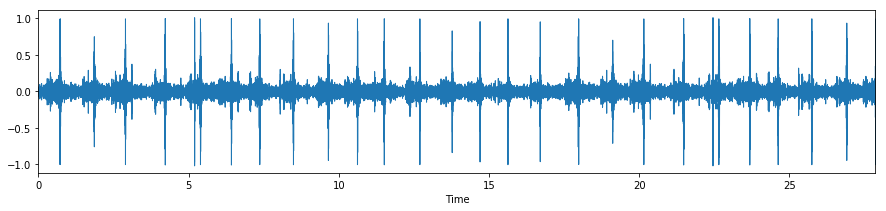

In [ ]:
i = np.random.randint(low=0, high=(len(data)-1))
fname, Xdb = explore_heartbeat(i)
ipd.Audio(os.path.join(PATH, fname))

In [7]:
def load_wave(fname):
    y, sr = librosa.load(os.path.join(PATH, fname))
    return y

In [8]:
data["array"] = data.fname.apply(load_wave)

In [9]:
data["len_series"] = data["array"].apply(len)
MAX_LEN = max(data["len_series"])

In [10]:
MAX_LEN

614468